# Analysis of Variance

Suppose that we have multiple "groups" of data.  They may all come from the same population (and thus we would expect them all to have self-consistent sample means and variances.  Or, they may come from different populations, in which case we might expect their sample means and variances to differ from one another.  The process of ANalysis Of VAriance (ANOVA) is designed to assess which of these two situations exist.

We begin by assuming a null hypothesis - all of the groups come from the same population, and thus we expect the sample means to be consistent with one another.  Of course, we still expect some variance in the data WITHIN each group, due to random statistical fluctuations in any sampling experiment.

Imagine an experiment in which there are three groups of data, all taken from the same population, which has mu=100 and sigma=10

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

mu = 100
sigma = 10
N1 = 300

a1 = 3
n1 = 100

data1 = stats.norm.rvs(size=N1,loc=mu,scale=sigma)
group1a = data1[0:int(N1/3)]
group1b = data1[int(N1/3):int(2*N1/3)]
group1c = data1[int(2*N1/3):N1]

x1a = np.linspace(1,int(N1/3),int(N1/3))
x1b = np.linspace(int(N1/3)+1,int(2*N1/3),int(N1/3))
x1c = np.linspace(int(2*N1/3)+1,N1,int(N1/3))

plt.scatter(x1a,group1a)
plt.scatter(x1b,group1b)
plt.scatter(x1c,group1c)

print ("Variance of all 300 data points = %0.2f" % (data1.var()))

Variance of all 300 data points = 103.68


Now, imagine a second experiment, where there are three groups of data.  The three groups are taken from three different populations, with means of mu = (100, 110, 90).  The standard deviation of each of these populations is sigma = 6.0 

Variance of all 300 data points = 42.26


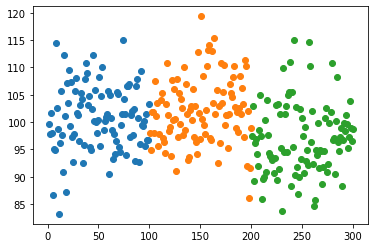

In [2]:
mu1 = 100
mu2 = 103
mu3 = 97

sigma = 6.2
N2 = 300

a2 = 3
n2 = 100

group2a = stats.norm.rvs(size=int(N2/3),loc=mu1,scale=sigma)
group2b = stats.norm.rvs(size=int(N2/3),loc=mu2,scale=sigma)
group2c = stats.norm.rvs(size=int(N2/3),loc=mu3,scale=sigma)

data2 = np.concatenate([group2a,group2b,group2c])

x2a = np.linspace(1,int(N2/3),int(N2/3))
x2b = np.linspace(int(N2/3)+1,int(2*N2/3),int(N2/3))
x2c = np.linspace(int(2*N2/3)+1,int(N2),int(N2/3))

plt.scatter(x2a,group2a)
plt.scatter(x2b,group2b)
plt.scatter(x2c,group2c)

print ("Variance of all 300 data points = %0.2f" % (data2.var()))

## The question is:  How do we differentiate between these two cases?

We will introduce some new terminology:

The number of data points within each group = $n$

The number of groups = $a$

The total number of data points = $N$ = $a \cdot n$

The overall average of all $N$ data points = $\bar{\bar{x}} = \frac{1}{N} \sum_{i=1}^{a} \sum_{j=1}^{n} {x_{ij}}$

The average of the $n$ data points for a group = $\bar{x}_i = \frac{1}{N} \sum_{j=1}^{n} {x_{ij}}$

Recall the definition of variance:

$s^2 = \frac{1}{N_{dof}} \sum_{i=1}^{a} \sum_{j=1}^{n} {(x_{ij}-\bar{\bar{x}})^2} = \frac{SS_{total}}{N_{dof}}$

where we have introduced the terminology "SS" = "Sum of Squares" to indicate the double summation term. $SS_{total}$ represents the total variance of the entire data set with respect to the overall sample mean of all data points.

We may also calculate two other sums of squares - one related to the statistical variation WITHIN groups, and a second related to the variation BETWEEN groups:

$SS_{error} = \sum_{i=1}^{a} \sum_{j=1}^{n}(x_{ij} - \bar{x}_i)^2$

$SS_{treatment} = \sum_{i=1}^{a} n(\bar{x}_i - \bar{\bar{x}})^2$

One can show that:

$SS_{total} = SS_{treatment} + SS_{error}$

In [3]:
dof1 = N1 - 1
SS1_total = dof1*data1.var(ddof=1)
print ("SS1_total = ",SS1_total)

xbarbar1 = data1.mean()
print ("Xbarbar1 = ",xbarbar1)

t1a = int(N1/3)*(group1a.mean()-xbarbar1)**2
t1b = int(N1/3)*(group1b.mean()-xbarbar1)**2
t1c = int(N1/3)*(group1c.mean()-xbarbar1)**2

SS1_treatment = t1a + t1b + t1c
print()
print ("SS1_treatment = ",SS1_treatment)

SS1_error = 0.0
for x in group1a:
    SS1_error += (x - group1a.mean())**2
for x in group1b:
    SS1_error += (x - group1b.mean())**2
for x in group1c:
    SS1_error += (x - group1c.mean())**2
    
print ("SS1_error = ",SS1_error)

print ()
print ("Total Check: ",SS1_error + SS1_treatment, SS1_total)

SS1_total =  31105.16563763399
Xbarbar1 =  99.7844913681845

SS1_treatment =  348.80128464737106
SS1_error =  30756.36435298659

Total Check:  31105.165637633963 31105.16563763399


In [4]:
dof2 = N2 - 1
SS2_total = dof2*data2.var(ddof=1)
print ("SS2_total = ",SS2_total)

xbarbar2 = data2.mean()
print ("Xbarbar2 = ",xbarbar2)

sst = 0.0
for x in data2:
    sst += (x-xbarbar2)**2

t2a = int(N2/3)*(group2a.mean()-xbarbar2)**2
t2b = int(N2/3)*(group2b.mean()-xbarbar2)**2
t2c = int(N2/3)*(group2c.mean()-xbarbar2)**2

SS2_treatment = t2a + t2b + t2c
print()
print ("SS2_treatment = ",SS2_treatment)

SS2_error = 0.0
for x in group2a:
    SS2_error += (x - group2a.mean())**2
for x in group2b:
    SS2_error += (x - group2b.mean())**2
for x in group2c:
    SS2_error += (x - group2c.mean())**2
    
print ("SS2_error =",SS2_error)

print()
print ("Total Check: ",SS2_error + SS2_treatment, SS2_total)

SS2_total =  12676.882764631124
Xbarbar2 =  99.93275751740367

SS2_treatment =  1436.2449522203497
SS2_error = 11240.63781241077

Total Check:  12676.88276463112 12676.882764631124


### The $SS_{treatment}$ represents the "signal" that we are looking for, whereas $SS_{error}$ represents the "noise".  We can use these to calculate a signal to noise ratio for the data.  

We begin by calculating the MEAN SQUARE values:

$MS_{error} = N_{dof}^{error} \cdot SS_{error}$

$MS_{treatment} = N_{dof}^{treatment} \cdot SS_{treatment}$

where

$N_{dof}^{treatment} = (a - 1)$

$N_{dof}^{total} = N - 1$

$N_{dof}^{error} = N_{dof}^{total} - N_{dof}^{treatment}$

### The signal to noise ratio is the ratio of the treatment mean square to the error mean square, and is in fact an F value!

$F_{S/N} = \frac{MS_{treatment}}{MS_{error}}$

In [5]:
dof1_treatment = a1 - 1
dof1_total = N1 - 1
dof1_error = dof1_total - dof1_treatment

print ("Degrees of Freedom: total,treatment,error = ",dof1_total,dof1_treatment,dof1_error)

Degrees of Freedom: total,treatment,error =  299 2 297


In [6]:
MS1_error = SS1_error/dof1_error
MS1_treatment = SS1_treatment/dof1_treatment

print ("Mean Squares: ",MS1_treatment,MS1_error)

fSN = MS1_treatment/MS1_error

print ("F Signal/Noise = %0.3f " % fSN)

alpha = 0.05

fdist = stats.f(dof1_treatment,dof1_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.3f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

Mean Squares:  174.40064232368553 103.55678233328818
F Signal/Noise = 1.684 
Critical F-value = 3.026
Pvalue = 0.187


In [7]:
dof2_treatment = a2 - 1
dof2_total = N2 - 1
dof2_error = dof2_total - dof2_treatment

print ("Degrees of Freedom: total,treatment,error = ",dof2_total,dof2_treatment,dof2_error)

Degrees of Freedom: total,treatment,error =  299 2 297


In [8]:
MS2_error = SS2_error/dof2_error
MS2_treatment = SS2_treatment/dof2_treatment

print ("Mean Squares: ",MS2_treatment,MS2_error)

fSN = MS2_treatment/MS2_error

print ("F Signal/Noise = %0.3f " % fSN)

alpha = 0.05

fdist = stats.f(dof2_treatment,dof2_error)
fhigh = fdist.ppf(1-alpha)

print ("Critical F-value = %0.3f" % (fhigh))

if (fSN > 1):
    pvalue = (1-fdist.cdf(fSN))
else:
    pvalue = fdist.cdf(fSN)
    
print ("Pvalue = %0.3f" % (pvalue))

Mean Squares:  718.1224761101748 37.847265361652425
F Signal/Noise = 18.974 
Critical F-value = 3.026
Pvalue = 0.000


# Note the incredible power of this methodology in revealing differences between groups that are not visibly obvious!!!!

As you probably could have guessed, there are built in Python Stats functions that can make this process considerably easier!

In [9]:
F_statistic, pVal = stats.f_oneway(group1a, group1b, group1c)

print ("F Signal/Noise = %0.3f " % F_statistic)
print ("Pvalue = %0.3f" % (pVal))

F Signal/Noise = 1.684 
Pvalue = 0.187


In [10]:
F_statistic, pVal = stats.f_oneway(group2a, group2b, group2c)

print ("F Signal/Noise = %0.3f " % F_statistic)
print ("Pvalue = %0.3f" % (pVal))

F Signal/Noise = 18.974 
Pvalue = 0.000


In [11]:
groupA = group1a
groupB = group1b
groupC = group1c

a = 3
n = 100

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC])
id = np.concatenate([idA,idB,idC])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                 df        sum_sq     mean_sq         F    PR(>F)
C(treatment)    2.0    348.801285  174.400642  1.684106  0.187378
Residual      297.0  30756.364353  103.556782       NaN       NaN


In [12]:
groupA = group2a
groupB = group2b
groupC = group2c

a = 3
n = 100

idA = np.ones(n)
idB = 2.0*np.ones(n)
idC = 3.0*np.ones(n)

data = np.concatenate([groupA,groupB,groupC])
id = np.concatenate([idA,idB,idC])

data2 = np.transpose(np.vstack((data,id)))

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

df = pd.DataFrame(data2,columns=['value','treatment'])
model = ols('value ~ C(treatment)',df).fit()
anovaResults = anova_lm(model)

print (anovaResults)

                 df        sum_sq     mean_sq          F        PR(>F)
C(treatment)    2.0   1436.244952  718.122476  18.974224  1.758346e-08
Residual      297.0  11240.637812   37.847265        NaN           NaN
